<h2>Ridge regression: a note about standardization and ridge trace plots</h2>    
    
    
    

<h3> Abstract </h3>  
Ridge regression is known to:     

1. shrink the coefficients (giving estimates with lower variance)  
2. address multicollinearity in the least squares optimization  

The <i>ridge trace plot</i> was introduced by the original authors as a diagnostic <a href="#ref1">[1]</a>. (They also proposed that it could be used to select the ridge tuning parameter). In carrying out a ridge regression we need to scale the covariates. We will see that the ridge trace profiles for two scaling procedures, standardization and normalization, are different and offer an explanation.   

We will use the <i>sklearn, pandas</i> and<i> matplotlib </i> python packages and the [Boston housing data set](http://archive.ics.uci.edu/ml/datasets/Housing).


<h3>Introduction</h3>

Penalized regression methods like ridge regression and LASSO have become popular in recent years due to the large datasets with hundreds of parameters that we now work with and the easy availability of fast computation.   

A goal of regression is to estimate the coefficients to get good predictive performance. Ridge regression is useful when we are interested in prediction and there are a large number of predictors, some of which are invariably multicollinear. It gives a smaller mean square error (MSE) and a more stable solution than ordinary least squares because it addresses this issue of multicollinearity. 

One of the model assumptions we make with multiple linear regression is that the predictor variables are not highly correlated. Mathematically, this ensures that the problem is not ill-posed and that the design matrix is full rank. Multicollinearity when it exists, gives coefficients with high variance and this increases the chance of a Type II error (the failure to reject a false null hypothesis). In ridge regression, a bias term is included which improves the conditioning of the problem and reduces the variance of the estimates. 
  
A limitation of Ridge regression is that it cannot be used for variable selection: dropping some of the predictors when there are a large number can help with interpreting the model but with ridge, none of the coefficients can be set to zero.

<p>
In this example we look at some of the considerations specific to ridge regression. We will look at a diagram known as the <i>ridge trace plot</i> which plots the coefficients of the predictors versus the ridge tuning parameter, $\alpha$. This diagram shows the effect the penalty tuning parameter has on the coefficients. When it was first introduced, <i>ridge trace plots</i> were used to select the best ridge parameter $\alpha$ <a href="#ref1">[1]</a>. A more principled approach which uses cross-validation is now followed.  

In order to render the ridge trace plot, we first we need to compute the ridge regression coefficients. With penalized methods such as ridge, we usually need to scale the covariates so that the regularization is not skewed by their different magnitudes. Different methods have been applied to achieve this <a href="#ref2">[2]</a>.  The usual approach is to standardize the covariates using <i>(x_i - X_bar)/s</i>. Other formulas for standardization have been applied as well. In some cases the columns are normalized using <i>(x_i - X_bar)/(X_max - X_min)</i>; this results in a value that ranges from 0 to 1. It should be noted that the scaling is only done for the purpose of the regression. Once the regression is completed the coefficients need to be restored to their original scale.   
</p>

We will look at the ridge trace plots for the standardized covariates as well as the normalized covariates.   
  

In [65]:
# load the data set
boston = datasets.load_boston()
# boston is a dictionary with the following keys:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [66]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [67]:
# setting up the DataFrame with the predictor and response variables
X = pd.DataFrame(boston.data, columns = boston.feature_names)
Y = boston.target

In [68]:
# the StandardScalar function standardizes by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [69]:
# creating a ridge regression object
# setting up two ridge regression models clf1, clf2
# clf1 uses standardized covariates
# clf2 normalizes the covariates
clf1 = linear_model.Ridge(fit_intercept=False)
clf2 = linear_model.Ridge(normalize=True, fit_intercept=False)

In [73]:
# generating a range of alpha values
n_alphas = 200
alphas = np.logspace(-3, 7, n_alphas)

# fitting coefficients for each alpha
coefs1 = []
for a in alphas:
    clf1.set_params(alpha=a)
    clf1.fit(X_standard, Y)  #standardized covariates
    coefs1.append(clf1.coef_)
    
coefs2 = []
for a in alphas:
    clf2.set_params(alpha=a)
    clf2.fit(X, Y)          #normalized covariates
    coefs2.append(clf2.coef_)   

In [74]:
# put the fitted coefficients in a data frame for easy handling
coef1df = pd.DataFrame(coefs1, columns = boston.feature_names)

coef2df = pd.DataFrame(coefs2, columns = boston.feature_names)

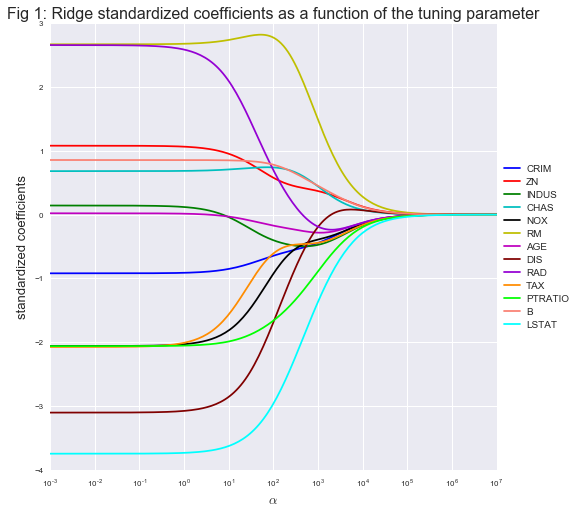

In [115]:
# plot the coefficients as a function of the regularization parameter, alpha.
# This plot is called the 'ridge trace'.

# Fig. 1 for standardized coefficients

plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm', 'maroon', 'darkviolet', 'darkorange', 'lime', 'salmon', 'aqua'])

ax.plot(alphas, coef1df)
ax.set_xscale('log')
plt.xlabel(r'$\alpha$', fontsize=13)
plt.ylabel('standardized coefficients', fontsize=13)
plt.title('Fig 1: Ridge standardized coefficients as a function of the tuning parameter', fontsize=16)

# Generating the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
legend = ax.legend(boston.feature_names, loc='center left', bbox_to_anchor=(1, 0.5))

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('medium')
    

plt.show()


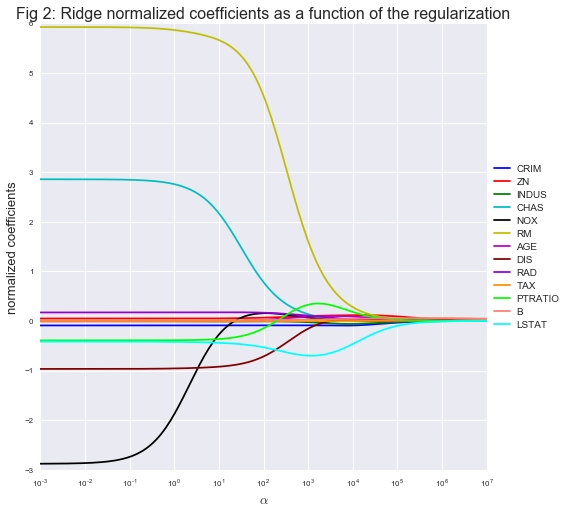

In [116]:
# Fig. 2 for normalized coefficients

plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm', 'maroon', 'darkviolet', 'darkorange', 'lime', 'salmon', 'aqua'])

ax.plot(alphas, coef2df)
ax.set_xscale('log')
plt.xlabel(r'$\alpha$', fontsize=13)
plt.ylabel('normalized coefficients', fontsize=13)
plt.title('Fig 2: Ridge normalized coefficients as a function of the regularization', fontsize=16)

# Generating the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
legend = ax.legend(boston.feature_names, loc='center left', bbox_to_anchor=(1, 0.5))

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('medium')
    

plt.show()

For both plots, we see the effect of the regularization: the coefficients are shrunk to zero as $\alpha$ increases. The ridge trace plot can also be used to guide the selection of $\alpha$. We want to introduce just enough bias for the regularization; this corresponds to an $\alpha$ where the coefficients are not rapidly changing. Cross validation, where the MSE is plotted against $\alpha$, is the most reliable method to pick $\alpha$ and with easy access to computation nowadays, it is the standard practice.

An interesting question that arises with these two plots --one scaled with standardized coefficients (Fig. 1) and the other with normalized coefficients (Fig. 2)-- is why are they different. Fig. 2 has a subset of coefficients that are small throughout whereas in Fig. 1 the coefficients converge to zero only when the tuning parameter becomes large.  
To answer this, consider that normalized coefficients range from 0 to 1; small values close to zero, when normalized, remain small and when squared (the penalty term has an L2 norm) get even smaller. Standardized coefficients on the other hand have a student's distribution. To summarize, the  two ridge profiles are an illustration of the fact that:  
1) small values when normalized remain small  
2) normalized covariates are always in the 0 to 1 range     
3) the L2 norm makes small values in the 0 to 1 range even smaller (see Fig. 3) 



Fig. 3 below shows a squared function in the 0 to 1 range.

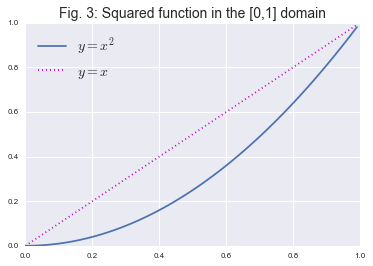

In [113]:
idx = np.arange(0,1,.01)
plt.plot(idx, idx*idx, label=r'$y = x^2$')
plt.plot(idx, idx, linestyle='dotted', color='m', label=r'$y=x$')
plt.title("Fig. 3: Squared function in the [0,1] domain", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

<h3>References</h3>  
  
<a name="ref1"></a> [1] [Hoerl, A.E. and Kennard, R. (1970). Ridge regression: Biased estimation for nonorthogonal problems.Technometrics,12:55-67](http://www.aliquote.org/articles/slides/mva_clinres/biblio/hoerl70.pdf)

<a name="ref2"></a> [2] [Sardy, Sylvain. "On the practice of rescaling covariates." International Statistical Review 76.2 (2008): 285-297](http://www.jstor.org/stable/27919617?seq=1#page_scan_tab_contents)

<div style="background-color: #FAAC58; margin-left: 0px; margin-right: 20px; padding-bottom: 8px; padding-left: 8px; padding-right: 8px; padding-top: 8px;">


Author:  Meena Mani  <br>
email:   meenas.mailbag@gmail.com  <br>  
twitter: @meena_uvaca   <br>

</div>
